# CS 6220 Data Mining — Assignment 9

# Step 1: Load and Split the Dataset

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = load_wine()
X, y = data.data, data.target

# Convert to binary classification
y_binary = (y < 1).astype(int)  # Convert to 0 and 1

# Split the data into 80% train and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)


# Step 2: Train Two Decision Tree Models
Model 1: Decision Tree with default settings.

Model 2: Decision Tree with max_depth=1.

In [4]:
# Model 1: Decision Tree with default settings
model_default = DecisionTreeClassifier(random_state=42)
model_default.fit(X_train, y_train)
y_pred_default = model_default.predict(X_test)

# Model 2: Decision Tree with max_depth=1
model_depth1 = DecisionTreeClassifier(max_depth=1, random_state=42)
model_depth1.fit(X_train, y_train)
y_pred_depth1 = model_depth1.predict(X_test)


# Step 3: Evaluate Both Models

1. Accuracy

In [7]:
accuracy_default = accuracy_score(y_test, y_pred_default)
accuracy_depth1 = accuracy_score(y_test, y_pred_depth1)

print("Default Model Accuracy:", accuracy_default)
print("Depth-1 Model Accuracy:", accuracy_depth1)


Default Model Accuracy: 0.9722222222222222
Depth-1 Model Accuracy: 0.9444444444444444


2. Precision and Recall

In [10]:
precision_default = precision_score(y_test, y_pred_default)
recall_default = recall_score(y_test, y_pred_default)
precision_depth1 = precision_score(y_test, y_pred_depth1)
recall_depth1 = recall_score(y_test, y_pred_depth1)

print("Default Model - Precision:", precision_default, "Recall:", recall_default)
print("Depth-1 Model - Precision:", precision_depth1, "Recall:", recall_depth1)


Default Model - Precision: 0.9333333333333333 Recall: 1.0
Depth-1 Model - Precision: 0.875 Recall: 1.0


3. Classification Report

In [13]:
print("Default Model Classification Report:\n", classification_report(y_test, y_pred_default))
print("Depth-1 Model Classification Report:\n", classification_report(y_test, y_pred_depth1))


Default Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       0.93      1.00      0.97        14

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

Depth-1 Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        22
           1       0.88      1.00      0.93        14

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



4. Confusion Matrix

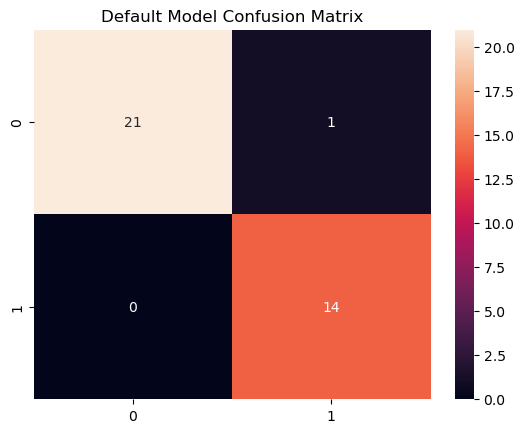

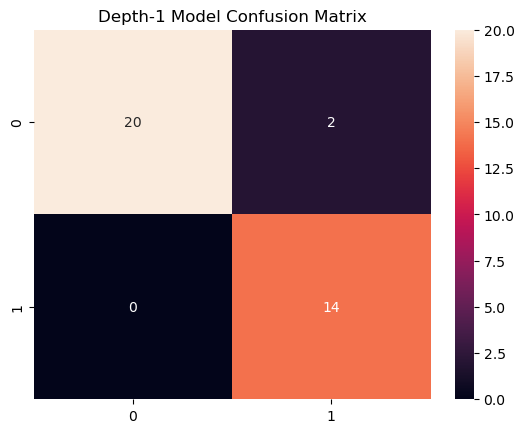

In [16]:
# Default Model Confusion Matrix
cm_default = confusion_matrix(y_test, y_pred_default)
sns.heatmap(cm_default, annot=True, fmt="d")
plt.title("Default Model Confusion Matrix")
plt.show()

# Depth-1 Model Confusion Matrix
cm_depth1 = confusion_matrix(y_test, y_pred_depth1)
sns.heatmap(cm_depth1, annot=True, fmt="d")
plt.title("Depth-1 Model Confusion Matrix")
plt.show()


5. ROC Curve

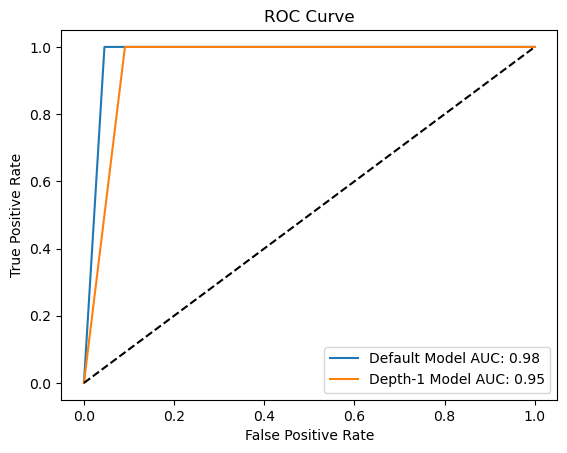

In [19]:
y_pred_prob_default = model_default.predict_proba(X_test)[:, 1]
y_pred_prob_depth1 = model_depth1.predict_proba(X_test)[:, 1]

fpr_default, tpr_default, _ = roc_curve(y_test, y_pred_prob_default)
fpr_depth1, tpr_depth1, _ = roc_curve(y_test, y_pred_prob_depth1)

plt.plot(fpr_default, tpr_default, label="Default Model AUC: {:.2f}".format(auc(fpr_default, tpr_default)))
plt.plot(fpr_depth1, tpr_depth1, label="Depth-1 Model AUC: {:.2f}".format(auc(fpr_depth1, tpr_depth1)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


6. Precision/Recall Curve


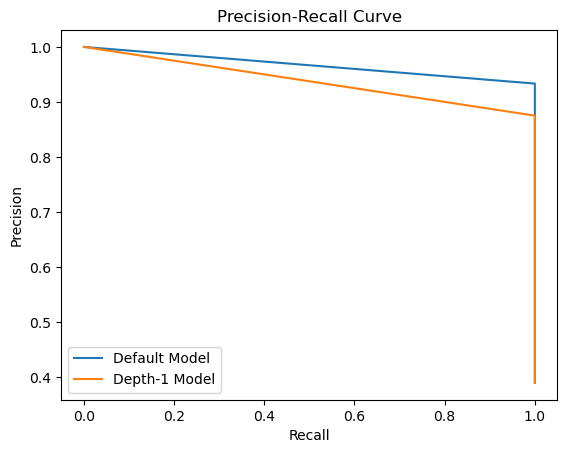

In [22]:
precision_default, recall_default, _ = precision_recall_curve(y_test, y_pred_prob_default)
precision_depth1, recall_depth1, _ = precision_recall_curve(y_test, y_pred_prob_depth1)

plt.plot(recall_default, precision_default, label="Default Model")
plt.plot(recall_depth1, precision_depth1, label="Depth-1 Model")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


Summary and Comparison

1. Accuracy:
* Default Model: 97.22%
* Depth-1 Model: 94.44%
* The Default model has a slightly higher accuracy, as it can capture more complex patterns than the Depth-1 model, which is limited by its depth restriction.
  
2. Precision and Recall:
* Default Model: Precision = 0.93, Recall = 1.0
* Depth-1 Model: Precision = 0.88, Recall = 1.0
* Both models have a recall of 1.0, indicating they perfectly identified all positive cases (class 1) in the test set. However, the Default model achieved a slightly higher precision, meaning it was slightly better at avoiding false positives.

3. Classification Report:
* The Default model achieved higher F1-scores, indicating a better balance between precision and recall across both classes.
* Both models performed well, but the Default model showed a marginally better performance, especially in precision for the positive class.

4. Confusion Matrix:
* For the Default Model, the confusion matrix shows only one false positive for class 0.
* The Depth-1 Model has two false positives, reflecting a slight drop in precision for this class.

5. ROC Curve:
* The AUC for the Default Model is 0.98, while for the Depth-1 Model, it’s 0.95.
* The Default model’s ROC curve is closer to the top-left corner, indicating better discriminatory power between the classes.

6. Precision-Recall Curve:
* The Default model maintains a higher precision over a range of recall values, as shown in the curve.
* This suggests that the Default model is generally better suited for imbalanced data, as it maintains high precision even at higher recall levels.

Conclusion:
The Default model outperforms the Depth-1 model in most evaluation metrics, especially in precision, accuracy, and the AUC of the ROC curve. Limiting the depth of the tree reduces the model's capacity to capture complex patterns, which is why the Default model generally achieves better results. However, the Depth-1 model may still be useful in cases where simplicity and interpretability are prioritized over minor improvements in performance.